***Assignment 2: Linear Regression***

The purpose of this activity is to develop a predictive model that can estimate the heating energy demand of buildings based on their architectural and structural features. By applying linear regression with ridge regularization to the Energy Efficiency dataset, the study aims to identify the most influential factors, such as building compactness, surface area, wall area, roof area, and glazing, that affect energy consumption. This will not only improve our understanding of how design choices impact energy efficiency but also provide valuable insights for designing sustainable and cost-effective buildings. Ultimately, the study seeks to demonstrate how data-driven approaches and machine learning can contribute to reducing energy use and promoting environmentally friendly engineering solutions.

Import the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

1. X1 Relative Compactness 
2. X2 Surface Area 
3. X3 Wall Area
4. X4 Roof Area
5. X5 Overall Height
6. X6 Orientation
7. X7 Glazing Area
8. X8 Glazing Area Distribution

9. y1 Heating Load
10. y2 Cooling Load


In [8]:
energy_data = pd.read_excel(
    'C:/Users/Juanito/OneDrive/Desktop/Machine-Learning/Datasets/Energy Efficiency Dataset/ENB2012_data.xlsx'
)

print(energy_data.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [9]:
num_rows, num_cols = energy_data.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 768, Number of columns: 10


In [11]:
X = energy_data.iloc[:, :-2]  # Features
y = energy_data['Y1']  # Targets (Heating Load and Cooling
print(X)
print(y)

       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64


General Guidelines

1. Split the samples into 60% training, 20% validation, and 20% testing data at random

In [15]:
# Splitting the sample data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test   = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Splits Verification
print(f"Training set size: {X_train.shape[0]}", )
print(f"Validation set size: {X_val.shape[0]}", )
print(f"Test set size:, {X_test.shape[0]}")

Training set size: 460
Validation set size: 154
Test set size:, 154


Normalization of Data using Ridge Regression Normalization Pipeline

In [17]:
# Scale features (X only)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), 
    columns=X_train.columns, 
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val), 
    columns=X_val.columns, 
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), 
    columns=X_test.columns, 
    index=X_test.index
)


2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)

In [18]:
'''
Ridge's alpha is the regularization strength
'''

alpha_values = np.logspace(-3, 3, 10)   # 10 random values fromm 0.001 to 1000

'''
Training Ridge for each and alpha and computation of R squared
'''
best_alpha = None
best_r2_val = -np.inf  # start with very low value
results = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_scaled, y_train)
    
    # Predict
    y_val_pred = ridge.predict(X_val_scaled)
    
    # Compute R² on validation
    r2_val = r2_score(y_val, y_val_pred)
    
    # Store results
    results.append((alpha, r2_val))
    
    # Update best alpha
    if r2_val > best_r2_val:
        best_r2_val = r2_val
        best_alpha = alpha




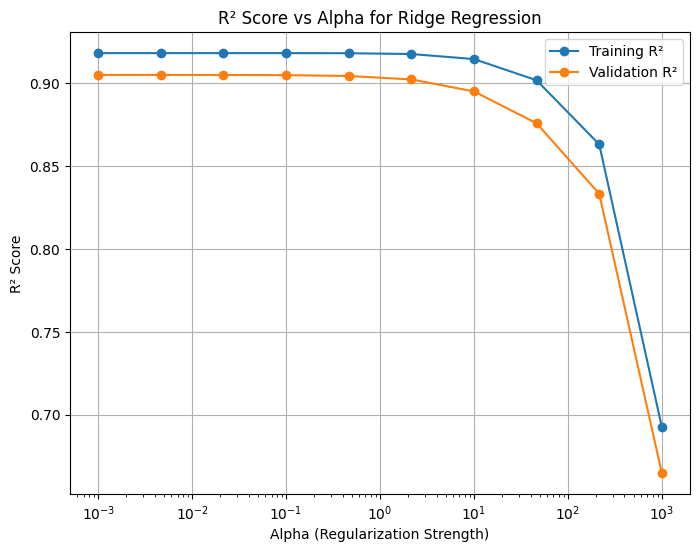

In [19]:
# If you also computed training R²:
train_scores = [r2_score(y_train, Ridge(alpha=a).fit(X_train_scaled, y_train).predict(X_train_scaled))
                for a in alpha_values]

val_scores = [r2 for alpha, r2 in results]

plt.figure(figsize=(8,6))
plt.plot(alpha_values, train_scores, label='Training R²', marker='o')
plt.plot(alpha_values, val_scores, label='Validation R²', marker='o')
plt.xscale('log')  # log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

**Make one final evaluation on the test data**

In [21]:
print(f"Best alpha: {best_alpha}, Best R² on validation: {best_r2_val}")


Best alpha: 0.001, Best R² on validation: 0.9050265244755586


In [26]:
# After finding best_alpha and training best_model
best_model = Ridge(alpha=best_alpha, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred = best_model.predict(X_test_scaled)

# Compute R² on test set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_nmse = test_mse / np.var(y_test)  # Normalized Mean Squared Error

print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test NMSE: {test_nmse:.4f}")


Test R² Score: 0.9196
Test MSE: 7.9021
Test NMSE: 0.0804


**4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?**

In [29]:
feature_names = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", 
                 "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]

# Retrieve coefficients and intercept
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": best_model.coef_
})

# Add intercept as a row
coef_df.loc[len(coef_df)] = ["Intercept", best_model.intercept_]

print("\nBest Model Coefficients and Intercept:")
print(coef_df.to_string(index=False))

# Model Accuracy Metrics table
accuracy_df = pd.DataFrame({
    "Dataset": ["Training", "Validation", "Test"],
    "R² Score": [train_r2, val_r2, test_r2]
})

# Compute R² scores
train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
val_r2 = val_scores[np.argmax(val_scores)]  # Best validation R^2 from earlier
test_r2 = r2_score(y_test, best_model.predict(X_test_scaled))

print("\nModel Accuracy Metrics:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Validation R² Score: {val_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")



Best Model Coefficients and Intercept:
                  Feature  Coefficient
     Relative Compactness    -6.306017
             Surface Area    -3.445962
                Wall Area     0.838132
                Roof Area    -3.740557
           Overall Height     7.279288
              Orientation    -0.020007
             Glazing Area     2.701373
Glazing Area Distribution     0.376468
                Intercept    22.079978

Model Accuracy Metrics:
Training R² Score: 0.9182
Validation R² Score: 0.9050
Test R² Score: 0.9196


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Feature names
feature_names = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area", 
    "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"
]

# Get coefficients and intercept from the best model
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": best_model.coef_
})

# Add intercept row at the end
coef_df.loc[len(coef_df)] = ["Intercept", best_model.intercept_]

print("\n=== Best Model Coefficients and Intercept ===")
print(coef_df.to_string(index=False))


train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
val_r2 = np.max(val_scores)  
test_r2 = r2_score(y_test, best_model.predict(X_test_scaled))


accuracy_df = pd.DataFrame({
    "Dataset": ["Training", "Validation", "Test"],
    "R² Score": [train_r2, val_r2, test_r2]
})

print("\n=== Model Accuracy Metrics ===")
print(accuracy_df.to_string(index=False))



=== Best Model Coefficients and Intercept ===
                  Feature  Coefficient
     Relative Compactness    -6.306017
             Surface Area    -3.445962
                Wall Area     0.838132
                Roof Area    -3.740557
           Overall Height     7.279288
              Orientation    -0.020007
             Glazing Area     2.701373
Glazing Area Distribution     0.376468
                Intercept    22.079978

=== Model Accuracy Metrics ===
   Dataset  R² Score
  Training  0.918186
Validation  0.905027
      Test  0.919587


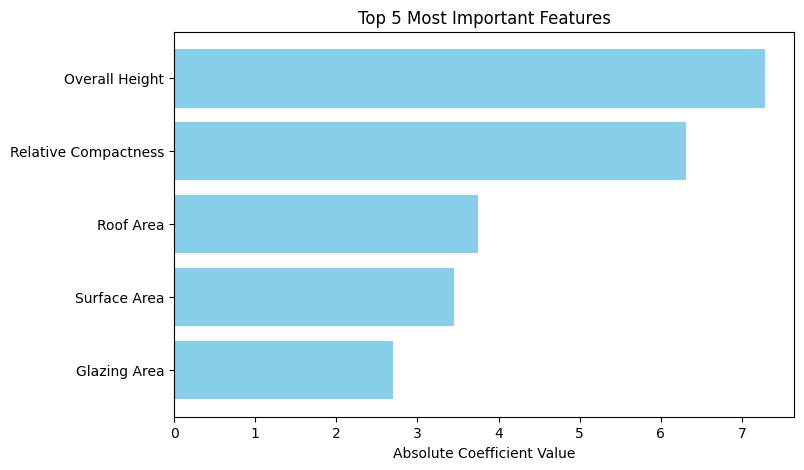


Top 5 Features by Importance:
             Feature  Coefficient
      Overall Height     7.279288
Relative Compactness    -6.306017
           Roof Area    -3.740557
        Surface Area    -3.445962
        Glazing Area     2.701373


In [33]:
# Get absolute values for ranking
coef_df["Abs_Coefficient"] = np.abs(coef_df["Coefficient"])

# Sort by absolute coefficient
top_features = coef_df[coef_df["Feature"] != "Intercept"].sort_values(
    by="Abs_Coefficient", ascending=False
).head(5)

# Plot
plt.figure(figsize=(8,5))
plt.barh(top_features["Feature"], top_features["Abs_Coefficient"], color="skyblue")
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 5 Most Important Features")
plt.gca().invert_yaxis()  # Largest at the top
plt.show()


print("\nTop 5 Features by Importance:")
print(top_features[["Feature", "Coefficient"]].to_string(index=False))


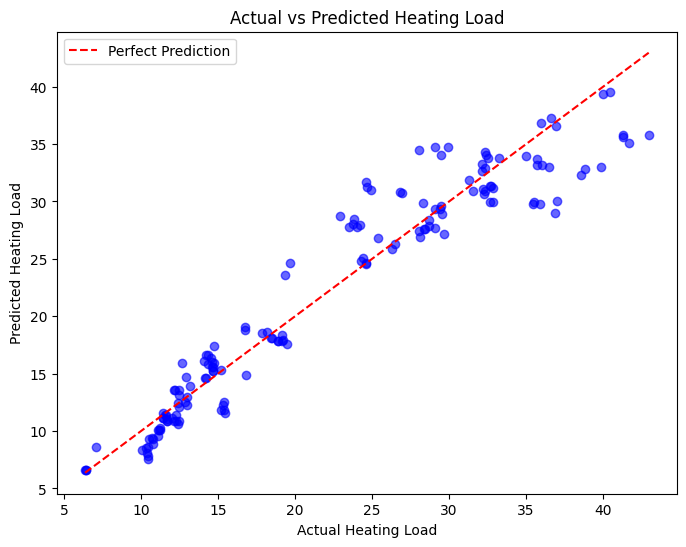

In [34]:
# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.legend()
plt.show()

**6. If you repeat the procedure above using only the 5 top features, what are the results?**

In [ ]:
# Split the samples
X = energy_data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']] 
y = energy_data['Y1']  

# List of top 5 feature names (corresponding to the features you provided)
top_5_features = ['X5', 'X1', 'X4', 'X2', 'X7']  

# Subset the data to include only the top 5 features by column names
X_top5 = X[top_5_features]

# Split the data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X_top5, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

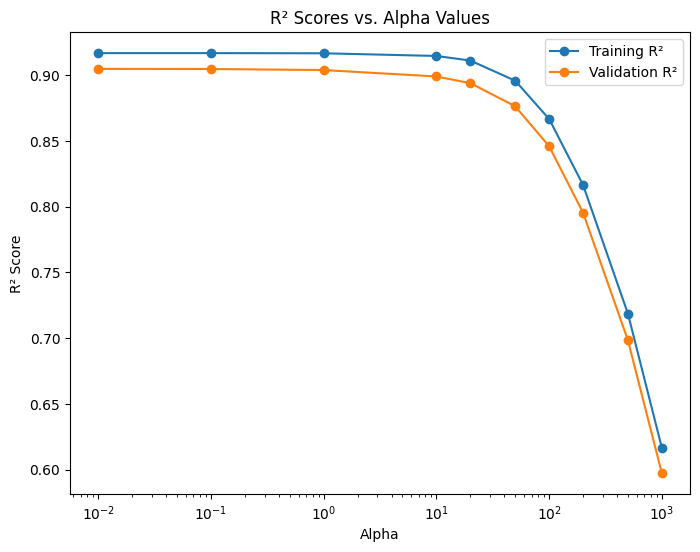

In [46]:
# Using Ridge Regularization with 10 different alpha values
alpha_values = [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500, 1000]
train_scores = []
val_scores = []

# Train the Ridge regression model with different alpha values
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    train_scores.append(r2_score(y_train, model.predict(X_train_scaled)))
    val_scores.append(r2_score(y_val, model.predict(X_val_scaled)))

# Plotting training and validation scores to find the best alpha visually
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, train_scores, label="Training R²", marker='o')
plt.plot(alpha_values, val_scores, label="Validation R²", marker='o')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("R² Scores vs. Alpha Values")
plt.legend()
plt.show()

In [47]:
# Find the best alpha based on the highest validation score
best_alpha = alpha_values[np.argmax(val_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 0.01


In [48]:
# Final Evaluation on the test data


# Train the model with the best alpha
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Calculate R², MSE, and NMSE
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_nmse = test_mse / np.var(y_test)

print(f"Test R²: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test NMSE: {test_nmse:.4f}")

Test R²: 0.9195
Test MSE: 7.9128
Test NMSE: 0.0805


In [50]:
# Best Model's Coefficients, Intercept, and Accuracy
top_5_features_names = ["Overall Height", "Relative Compactness", "Roof Area", "Surface Area", "Glazing Area"]

best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    "Feature": top_5_features_names,
    "Coefficient": best_model.coef_
})


print("\nBest Model Coefficients and Intercept:")
print(coef_df.to_string(index=False))
print(f"Intercept: {best_model.intercept_:.4f}")

# Computing R² scores for training, validation, and test sets
train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
val_r2 = r2_score(y_val, best_model.predict(X_val_scaled))
test_r2 = r2_score(y_test, best_model.predict(X_test_scaled))

# Displaying model accuracy metrics
accuracy_df = pd.DataFrame({
    "Dataset": ["Training", "Validation", "Test"],
    "R² Score": [train_r2, val_r2, test_r2]
})

print("\nModel Accuracy Metrics:")
print(accuracy_df.to_string(index=False))   


Best Model Coefficients and Intercept:
             Feature  Coefficient
      Overall Height     7.280260
Relative Compactness    -6.280831
           Roof Area    -5.460913
        Surface Area    -1.752011
        Glazing Area     2.771675
Intercept: 22.0800

Model Accuracy Metrics:
   Dataset  R² Score
  Training  0.916828
Validation  0.904842
      Test  0.919478


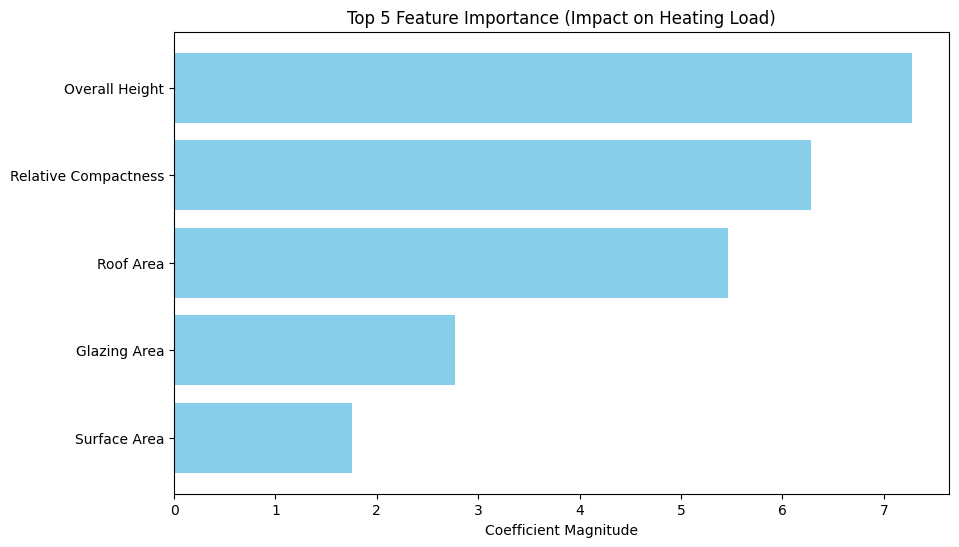

In [51]:
# Top 5 Features by Importance through Impact on Heating Load

# List of feature names for the top 5 features (matching your provided list)
top_5_features = ["Overall Height", "Relative Compactness", "Roof Area", "Surface Area", "Glazing Area"]

# Compute feature importance (absolute value of coefficients)
feature_importance = np.abs(best_model.coef_)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [top_5_features[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel("Coefficient Magnitude")
plt.title("Top 5 Feature Importance (Impact on Heating Load)")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()




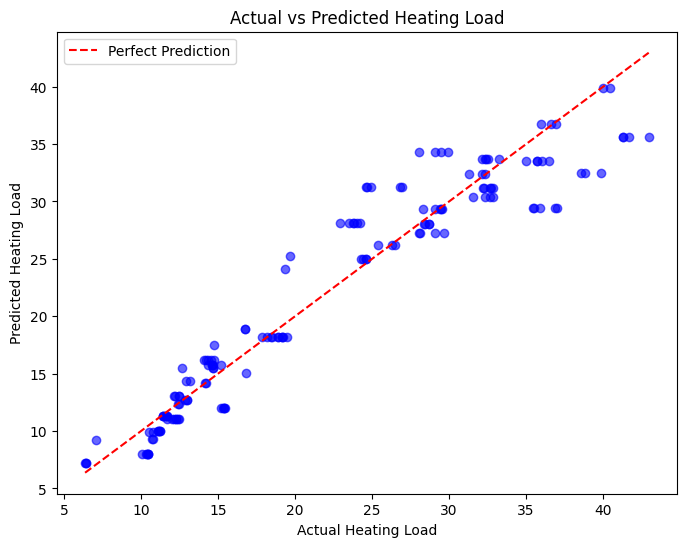

In [52]:
# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.legend()
plt.show()

### Guide Questions ###

**1. What is the impact of removing certain features on the model’s performance?**

### 1. What is the impact of removing certain features on the model's performace?

Removing less important features can simplify the model, reduce overfitting, and improve performance. However, if important features are removed, accuracy may drop.

---

### 2. Why split into train/validation/test sets?
Splitting prevents the model from memorizing the data.

- **Train set**: learn patterns  
- **Validation set**: tune hyperparameters  
- **Test set**: check final performance  

If skipped, the model may seem accurate but fail on new, unseen data.  

---

### 3. Assessing generalization ability
We assess **generalization** using the **test data** (never seen during training/validation).

**To ensure good generalization:**
- Use proper train/val/test splits  
- Apply regularization (e.g., Ridge)  
- Avoid overfitting by simplifying the model or removing noise  
